In [ ]:
# !pip install --upgrade -r requirements.txt

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn_extra.cluster import KMedoids

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

In [27]:
df = pd.read_csv('Dados-Tarefa-02.csv', index_col = 'Index', names = ['Index','x','y'], header = 0)
df

,x,y
Index,,
0,1.225160,-0.951731
1,1.016304,-1.725175
2,0.335340,-1.724896
3,1.786348,-1.782653
4,1.016751,1.062569
...,...,...
995,0.929594,-0.743331
996,-0.338431,-0.343315
997,1.542708,-0.055665


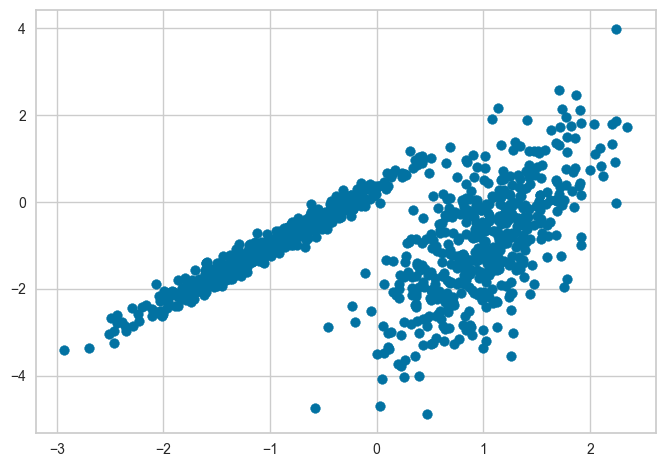

In [28]:
plt.scatter(df['x'],df['y'])

Elbow Evaluation

In [29]:
def elbowEvaluator(data, model):
    vizualizer = KElbowVisualizer(model,k=(2,20))
    return vizualizer.fit(data)

Silhouette Evaluation

In [30]:
def silhouetteEvaluator(data,Method,k_range):
    visualizers = []
    for idx,k in enumerate(k_range):
        model = KMedoids(n_clusters=k,random_state=10)
        vizualizer = SilhouetteVisualizer(model,colors='yellowbrick')
        visualizers.append(vizualizer.fit(data))
    return visualizers

KMEANS

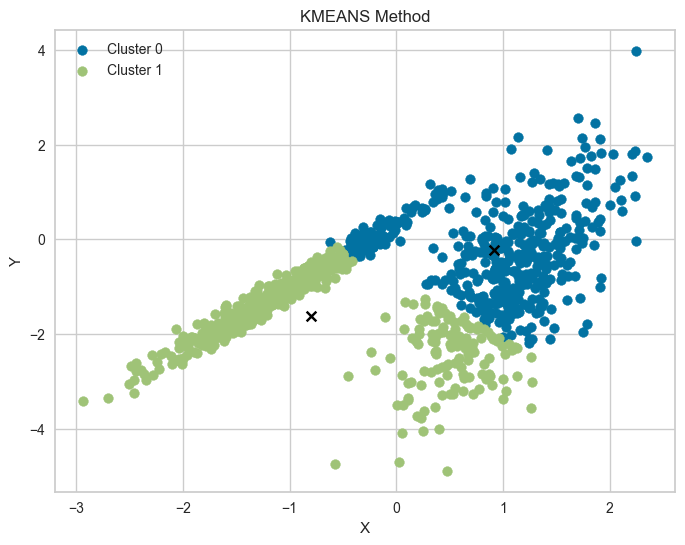

In [31]:
data = df.copy()
k = 2

kmeans = KMeans(n_clusters=k,random_state=10,n_init='auto')
kmeans.fit(data)
data['cluster'] = kmeans.predict(data)

plt.figure(figsize=(8, 6))

for i in np.unique(kmeans.labels_):
    row = data.index[kmeans.labels_ == i].tolist()
    scatter = plt.scatter(data.iloc[row,0],data.iloc[row,1],label = f'Cluster {i}')
    color = scatter.get_facecolors()[0].tolist()
    plt.scatter(kmeans.cluster_centers_[i][0],
                kmeans.cluster_centers_[i][1],
                color='black', marker='x')
    
plt.title('KMEANS Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

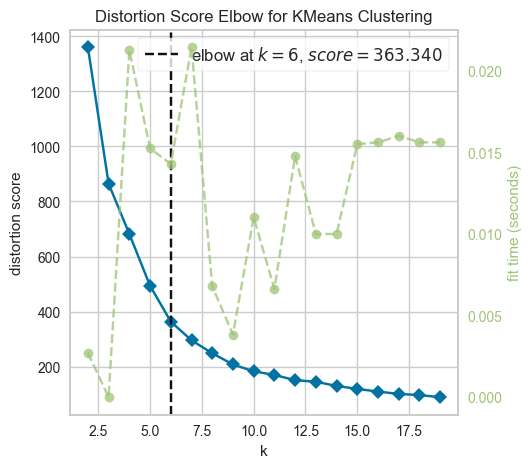

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
#Elbow method
fig = plt.figure(figsize=(5, 5))
model = KMeans(random_state=10)
visualizer = elbowEvaluator(data,model)
visualizer.show()

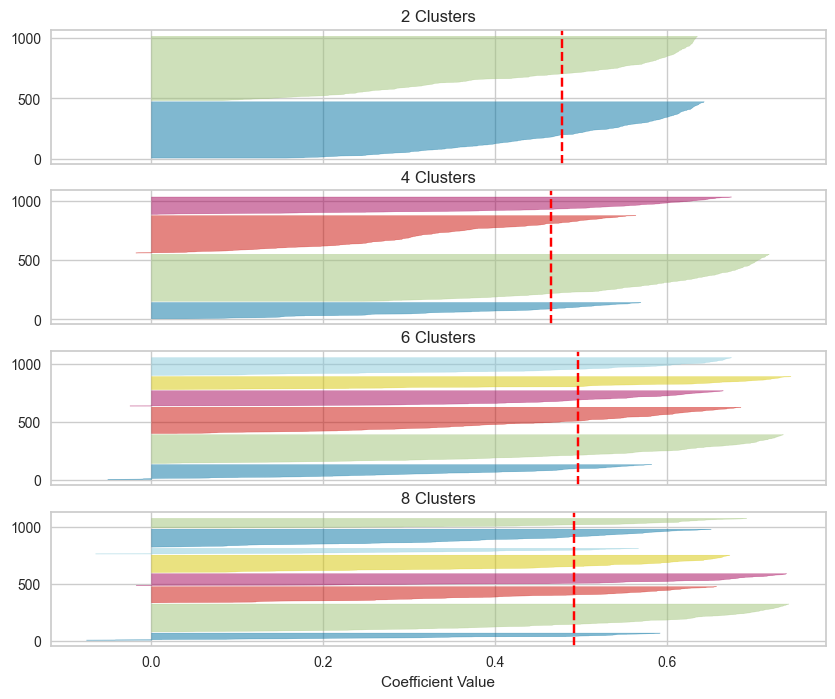

<Figure size 500x500 with 0 Axes>

In [33]:
#Silhouette method
k_range = [2,4,6,8]

fig, ax = plt.subplots(len(k_range),1,figsize=(10,8), sharex=True)
fig = plt.figure(figsize=(5, 5))

for idx,k in enumerate(k_range):
    model = KMeans(n_clusters=k,random_state=10)
    vizualizer = SilhouetteVisualizer(model,colors='yellowbrick',ax = ax[idx])
    vizualizer.fit(data)
    ax[idx].set_title(f'{k} Clusters')

ax[-1].set_xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

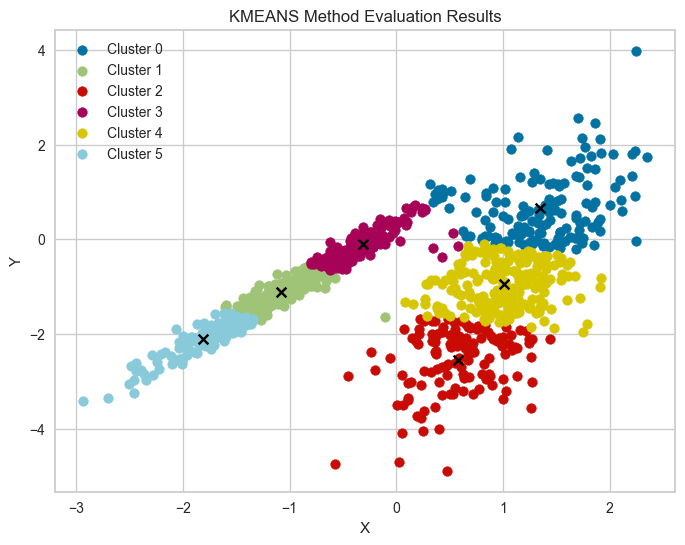

In [51]:
#KMEANS with evaluation results

#Considerando a avaliação elbow e silhouette, o número ideal de clusters seria 6

data = df.copy()
k = 6

kmeans = KMeans(n_clusters=k,random_state=10,n_init='auto')
kmeans.fit(data)
data['cluster'] = kmeans.predict(data)

plt.figure(figsize=(8, 6))
for i in np.unique(kmeans.labels_):
    row = data.index[kmeans.labels_ == i].tolist()
    scatter = plt.scatter(data.iloc[row,0],data.iloc[row,1],label = f'Cluster {i}')
    color = scatter.get_facecolors()[0].tolist()
    plt.scatter(kmeans.cluster_centers_[i][0],
                kmeans.cluster_centers_[i][1],
                color='black', marker='x')
        

plt.title('KMEANS Method Evaluation Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

KMedoid

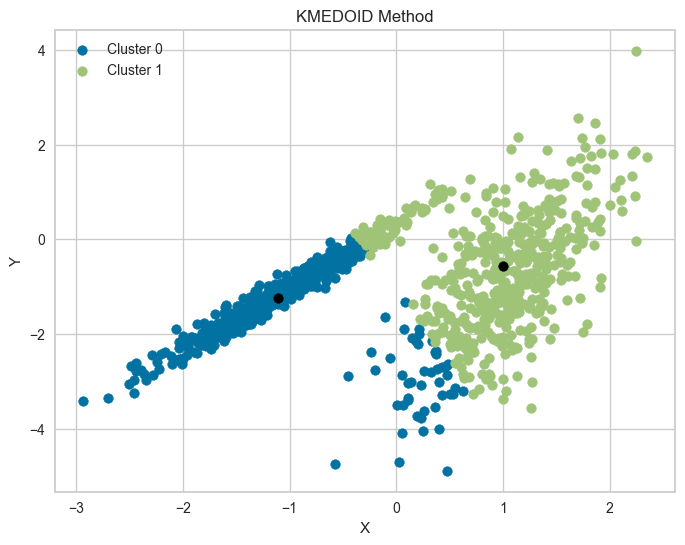

In [35]:
data = df.copy()
k = 2

kmedoid = KMedoids(n_clusters=k,random_state=10).fit(data)
data['cluster'] = kmedoid.predict(data)

plt.figure(figsize=(8, 6))

for i in np.unique(kmedoid.labels_):
    row = data.index[kmedoid.labels_ == i].tolist()
    scatter = plt.scatter(data.iloc[row,0],data.iloc[row,1],label = f'Cluster {i}')
    color = scatter.get_facecolors()[0].tolist()
    plt.scatter(kmedoid.cluster_centers_[i][0],
                kmedoid.cluster_centers_[i][1],
                color='black', marker='o')
    
plt.title('KMEDOID Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

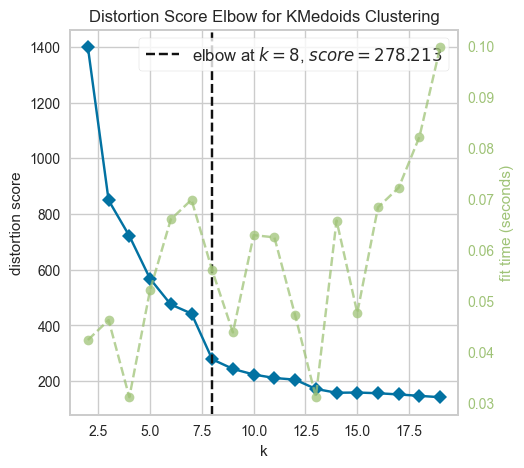

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
#Elbow method
fig = plt.figure(figsize=(5, 5))
model = KMedoids(random_state=10)
visualizer = elbowEvaluator(data,model)
visualizer.show()

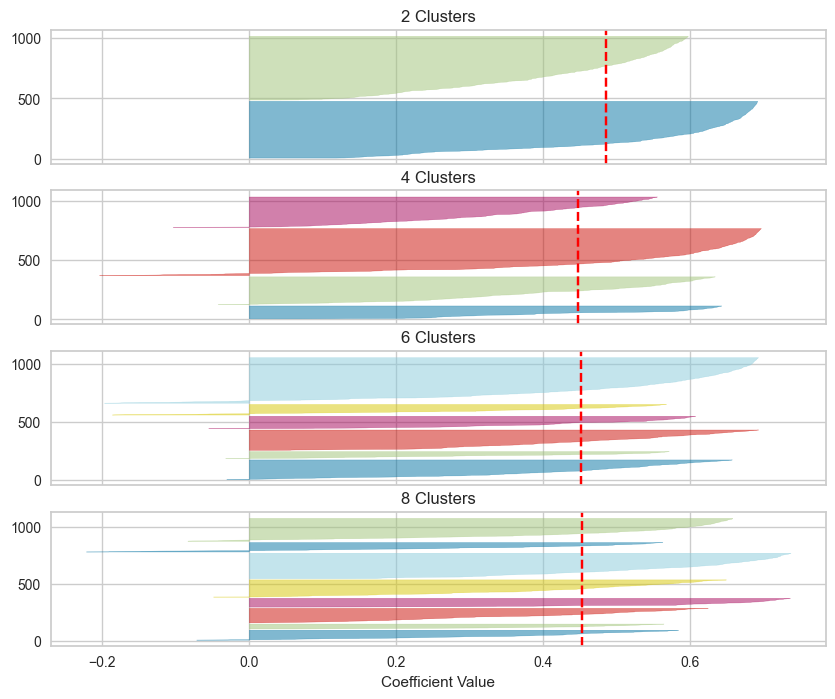

<Figure size 500x500 with 0 Axes>

In [37]:
#Silhouette method
k_range = [2,4,6,8]

fig, ax = plt.subplots(len(k_range),1,figsize=(10,8), sharex=True)
fig = plt.figure(figsize=(5, 5))

for idx,k in enumerate(k_range):
    model = KMedoids(n_clusters=k,random_state=10)
    vizualizer = SilhouetteVisualizer(model,colors='yellowbrick',ax = ax[idx])
    vizualizer.fit(data)
    ax[idx].set_title(f'{k} Clusters')

ax[-1].set_xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

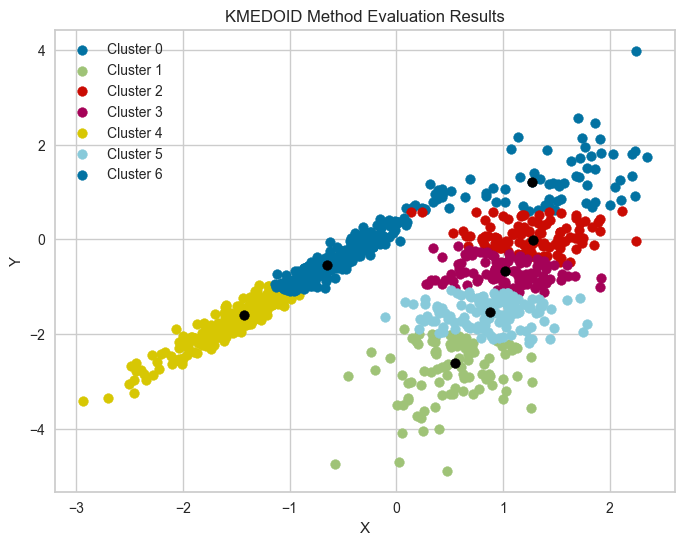

In [54]:
#KMEDOID with evaluation results

#A avaliação elbow apresentou 2 "cotovelos", em 6 e 8 clusters
#Considerando juntamente as avaliações elbow e silhouette o número de clusters ideal estaria entre 6 e 8
#Definindo como 7 o número de clusters, o resultado foi bem equilibrado 


data = df.copy()
k = 7

kmedoid = KMedoids(n_clusters=k,random_state=10).fit(data)
data['cluster'] = kmedoid.predict(data)

plt.figure(figsize=(8, 6))


for i in np.unique(kmedoid.labels_):
    row = data.index[kmedoid.labels_ == i].tolist()
    scatter = plt.scatter(data.iloc[row,0],data.iloc[row,1],label = f'Cluster {i}')
    color = scatter.get_facecolors()[0].tolist()
    plt.scatter(kmedoid.cluster_centers_[i][0],
                kmedoid.cluster_centers_[i][1],
                color='black', marker='o')
    
plt.title('KMEDOID Method Evaluation Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

DBSCAN

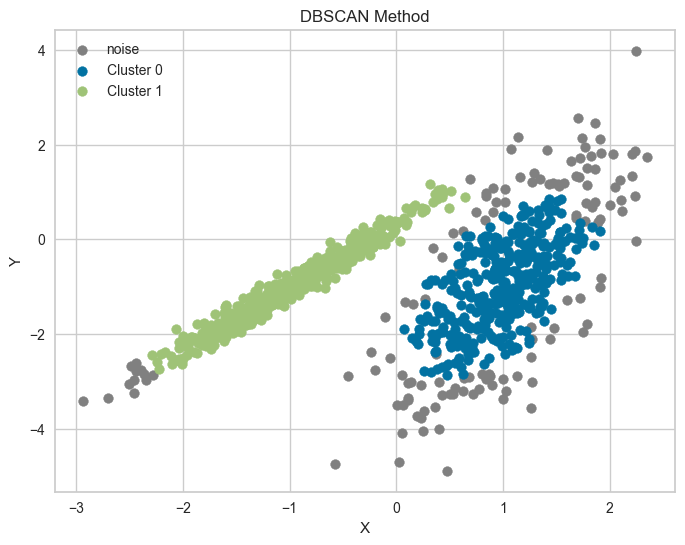

In [39]:
data = df.copy()
dbscan = DBSCAN(eps=0.2,min_samples=9).fit(data)
data['cluster'] = dbscan.fit_predict(data)

plt.figure(figsize=(8, 6))

for label in np.unique(dbscan.labels_):
    cluster_data = data[data['cluster'] == label]
    if label == -1:
        plt.scatter(cluster_data['x'],cluster_data['y'], color = 'gray', label = 'noise')
        # break
    else:
        plt.scatter(cluster_data['x'],cluster_data['y'], label = f'Cluster {label}')
        
plt.title('DBSCAN Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



BIRCH

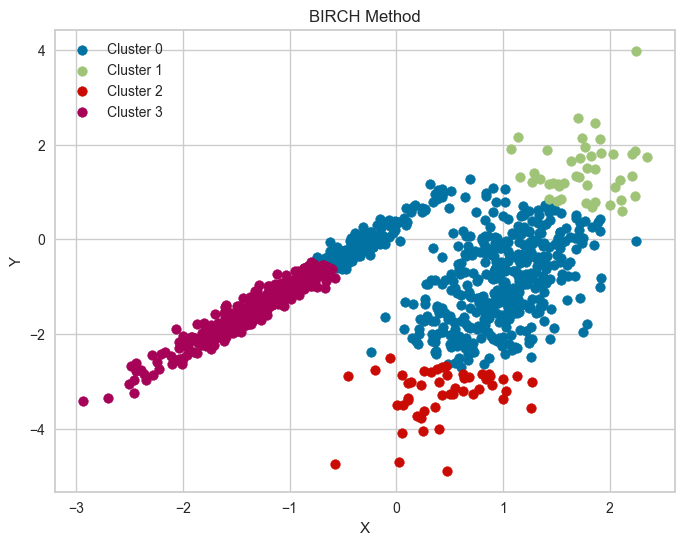

In [40]:
data = df.copy()

birch = Birch(n_clusters=4,threshold=0.5).fit(data)
data['cluster'] = birch.fit_predict(data)

plt.figure(figsize=(8, 6))

for label in np.unique(birch.labels_):
    cluster_data = data[data['cluster'] == label]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {label}')

plt.title('BIRCH Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

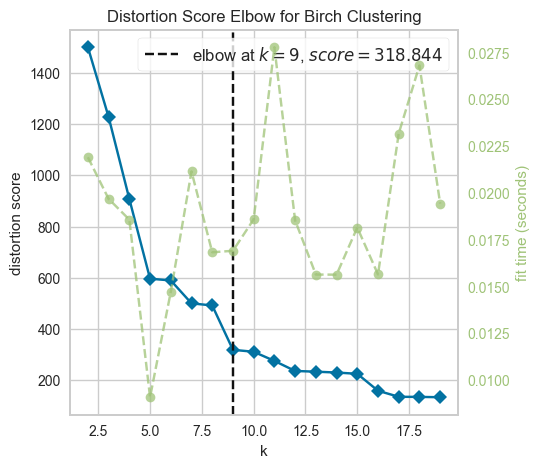

<Axes: title={'center': 'Distortion Score Elbow for Birch Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
#Elbow method
fig = plt.figure(figsize=(5, 5))
model = Birch(threshold=0.4)
visualizer = elbowEvaluator(data,model)
visualizer.show()

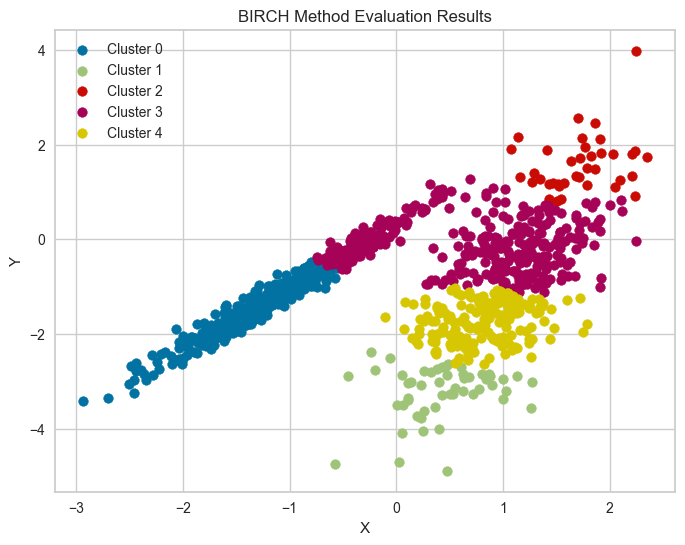

In [49]:
#O resultado da avaliação elbow do metodo birch retornou 9 clusters
#Porém o gráfico apresentou 2 elbows, sendo o resultado do primeiro mais equilibrado
#

data = df.copy()

birch = Birch(n_clusters=5,threshold=0.4).fit(data)
data['cluster'] = birch.fit_predict(data)

plt.figure(figsize=(8, 6))

for label in np.unique(birch.labels_):
    cluster_data = data[data['cluster'] == label]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {label}')

plt.title('BIRCH Method Evaluation Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()